### Adding libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import *

In [3]:
import tensorflow as tf
from tensorflow import keras

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Overview the data

In [32]:
df = pd.read_csv('Dataset\MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [35]:
df.shape

(63023, 13)

In [36]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

Nhan xet (NX): `Price` co rat nhieu gia tri null

In [37]:
# Tap hop cac dong chua du lieu cot Price null thanh 1 dataframe moi
price_null = df[df['Price'].isnull()]
price_null.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
15,Altona Meadows,57 Tatman Dr,4,h,NaN,SN,Barry,1/04/2017,3028,Western Metropolitan,7630,15.5,Hobsons Bay City Council
24,Ashburton,1 Pitt St,4,h,NaN,S,Jellis,1/04/2017,3147,Southern Metropolitan,3052,10.2,Boroondara City Council
29,Attwood,46 Threadneedle St,4,h,NaN,SN,Barry,1/04/2017,3049,Northern Metropolitan,1130,16.5,Hume City Council
38,Balwyn North,12 Agnes Av,3,h,NaN,SP,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council


In [38]:
price_null.shape

(14590, 13)

In [39]:
# Loai bo cac gia tri null o dataframe ban dau
df = df[pd.notnull(df['Price'])]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


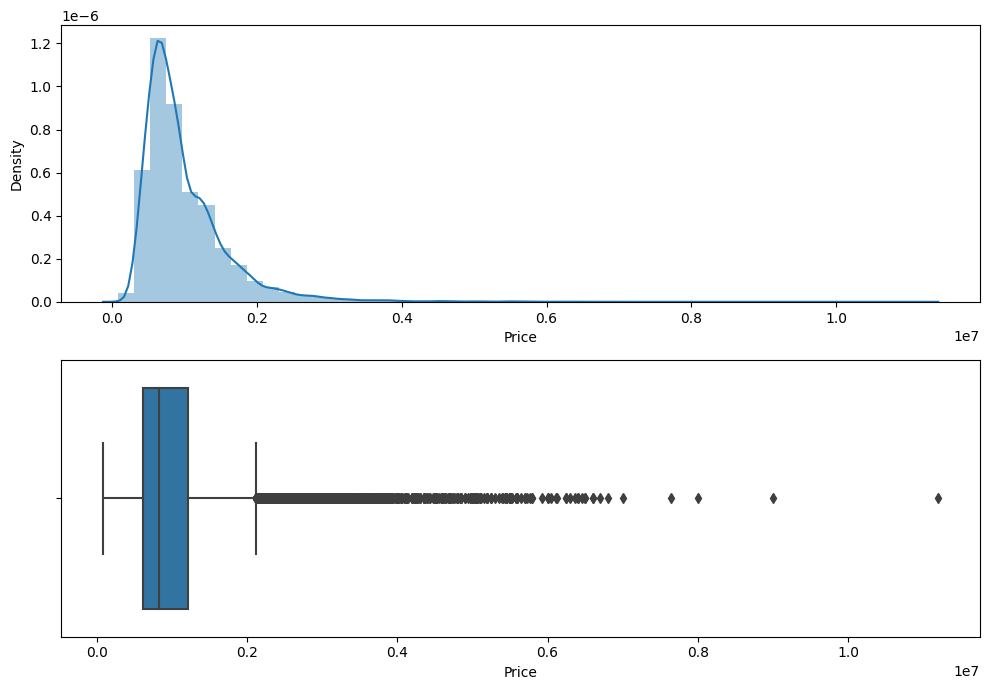

In [41]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['Price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['Price'])
plt.tight_layout()

NX: `Price` co rat nhieu outliers, phan phoi tap trung tu 0 - 0.2

### Build model

In [42]:
X = df.drop('Price',axis =1)
y = df['Price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [44]:
category = df.select_dtypes('O').columns.to_list()
category

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'Regionname',
 'CouncilArea']

In [45]:
# use target encoding
te = TargetEncoder(cols=category)

In [46]:
# transform the datasets
training_data = te.fit_transform(X_train,y_train)
testing_data = te.transform(X_test)

In [47]:
# scale data
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(training_data.astype(np.float))
X_test = s_scaler.transform(testing_data.astype(np.float))

In [50]:
model = Sequential([
    Dense(12, activation='relu', input_shape=[12]),
    Dense(12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1)
])

In [57]:
model.compile(
    optimizer='Adam',
    loss = 'mse'
)

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
eary_stoping = EarlyStopping(
    min_delta=0.001,
    patience = 20,
    restore_best_weights=True
)

In [58]:
history = model.fit(
    x=X_train, y=y_train,
    validation_data = (X_test, y_test),
    batch_size = 128,
    epochs = 400,
    callbacks = [eary_stoping],
    verbose = 1
)

Epoch 1/400
303/303 [==============================] - 5s 5ms/step - loss: 1342578491392.0000 - val_loss: 1366917906432.0000
Epoch 2/400
303/303 [==============================] - 1s 4ms/step - loss: 1303352573952.0000 - val_loss: 1235506954240.0000
Epoch 3/400
303/303 [==============================] - 1s 4ms/step - loss: 930390147072.0000 - val_loss: 596363640832.0000
Epoch 4/400
303/303 [==============================] - 1s 4ms/step - loss: 361202155520.0000 - val_loss: 271997075456.0000
Epoch 5/400
303/303 [==============================] - 1s 3ms/step - loss: 234302701568.0000 - val_loss: 228999806976.0000
Epoch 6/400
303/303 [==============================] - 1s 3ms/step - loss: 203378753536.0000 - val_loss: 205947043840.0000
Epoch 7/400
303/303 [==============================] - 1s 3ms/step - loss: 184034164736.0000 - val_loss: 188379807744.0000
Epoch 8/400
303/303 [==============================] - 1s 3ms/step - loss: 168625324032.0000 - val_loss: 173828751360.0000
Epoch 9/400


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 637
Trainable params: 637
Non-trainable params: 0
_________________________________________________________________


Minimun validation loss: 104383217664.0


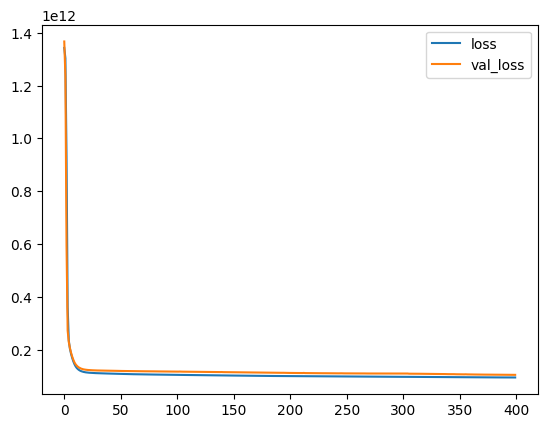

In [60]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimun validation loss: {}'.format(history_df['val_loss'].min()))

### Evaluation on test data

In [62]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))


303/303 [==============================] - 1s 4ms/step
MAE: 191351.37647426964
MSE: 104383213770.36363
RMSE: 323083.9113455878
VarScore: 0.7096725017170944


NX: model chua duoc tot khi Var score chi dat ~71%

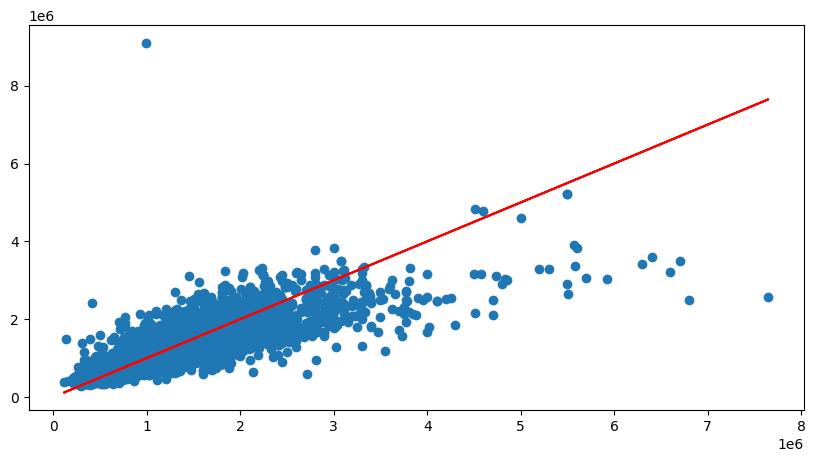

In [63]:
# Visualizing  predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

### Predict missing value in dataset

In [65]:
# dataset that price missing
price_null

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
15,Altona Meadows,57 Tatman Dr,4,h,NaN,SN,Barry,1/04/2017,3028,Western Metropolitan,7630,15.5,Hobsons Bay City Council
24,Ashburton,1 Pitt St,4,h,NaN,S,Jellis,1/04/2017,3147,Southern Metropolitan,3052,10.2,Boroondara City Council
29,Attwood,46 Threadneedle St,4,h,NaN,SN,Barry,1/04/2017,3049,Northern Metropolitan,1130,16.5,Hume City Council
38,Balwyn North,12 Agnes Av,3,h,NaN,SP,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63001,Wyndham Vale,15 Yaltara Dr,3,h,NaN,S,hockingstuart,30/12/2017,3024,Western Metropolitan,5262,27.2,Wyndham City Council
63008,Yarraville,4/247 Williamstown Rd,3,t,NaN,S,Jas,30/12/2017,3013,Western Metropolitan,6543,6.3,Maribyrnong City Council
63010,Burwood,29 Summit Rd,4,h,NaN,PN,@Realty,31/03/2018,3125,Southern Metropolitan,5678,10.4,Monash City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [68]:
X_new = price_null.drop('Price',axis =1)
y_new = price_null['Price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.2)

In [73]:
# encode
X_encode = te.transform(X_new)

In [74]:
# Scale
X_scale = s_scaler.transform(X_encode.astype(np.float))

In [76]:
price_predict = model.predict(X_scale)

456/456 [==============================] - 1s 3ms/step


In [77]:
price_null['New predict'] = price_predict

In [78]:
price_null.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,New predict
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council,8.019068e+05
15,Altona Meadows,57 Tatman Dr,4,h,NaN,SN,Barry,1/04/2017,3028,Western Metropolitan,7630,15.5,Hobsons Bay City Council,6.843775e+05
24,Ashburton,1 Pitt St,4,h,NaN,S,Jellis,1/04/2017,3147,Southern Metropolitan,3052,10.2,Boroondara City Council,1.943429e+06
29,Attwood,46 Threadneedle St,4,h,NaN,SN,Barry,1/04/2017,3049,Northern Metropolitan,1130,16.5,Hume City Council,7.283050e+05
38,Balwyn North,12 Agnes Av,3,h,NaN,SP,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council,1.687442e+06
42,Balwyn North,1 Kalka St,4,h,NaN,SP,Jellis,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council,2.110924e+06
48,Beaumaris,2/3 Hutchison Av,2,t,NaN,VB,Ray,1/04/2017,3193,Southern Metropolitan,5366,17.3,Bayside City Council,7.916550e+05
54,Bentleigh,2 Smith St,2,h,NaN,S,Woodards,1/04/2017,3204,Southern Metropolitan,6795,11.4,Glen Eira City Council,1.004696e+06
56,Bentleigh East,7/646 Centre Rd,2,u,NaN,S,Woodards,1/04/2017,3165,Southern Metropolitan,10969,13.8,Glen Eira City Council,6.318341e+05
62,Black Rock,11b Ardoyne St,3,t,NaN,S,Marshall,1/04/2017,3193,Southern Metropolitan,2866,17.3,Bayside City Council,1.277850e+06
